Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# EDA

In [4]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

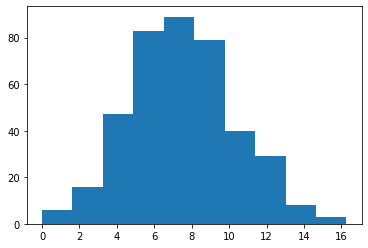

In [5]:
import matplotlib.pyplot as plt
plt.hist(df["Sales"])

In [6]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
# no null values
import seaborn as sns

<AxesSubplot:>

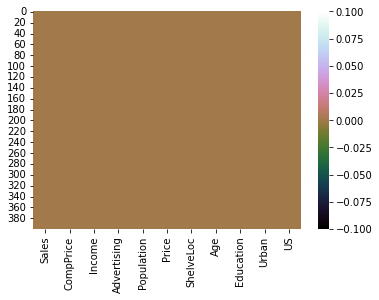

In [8]:
sns.heatmap(df.isnull(),cmap="cubehelix") #Matrix plotting

# Data visualization

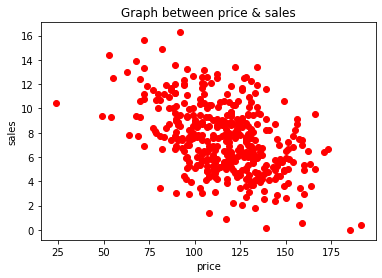

In [9]:
plt.scatter(df["Price"],df["Sales"],color="red")
#plt.plot(df["Price"],df["Sales"],color="blue")

plt.title("Graph between price & sales")
plt.xlabel("price")
plt.ylabel("sales")
plt.show()

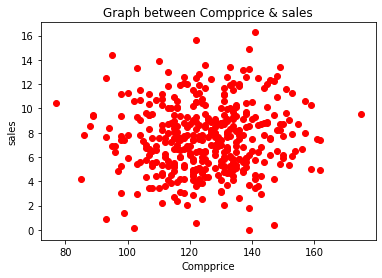

In [10]:
plt.scatter(df["CompPrice"],df["Sales"],color="red")
#plt.plot(df["Price"],df["Sales"],color="blue")

plt.title("Graph between Compprice & sales")
plt.xlabel("Compprice")
plt.ylabel("sales")
plt.show()

In [11]:
m = df["ShelveLoc"].value_counts()
m

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

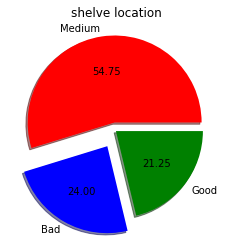

In [12]:
plt.pie(m,colors=["red","blue","green"],autopct="%0.2f",labels=["Medium","Bad","Good"],explode=(0.1,0.2,0),
       shadow=True)

plt.title("shelve location")
plt.show()

In [13]:
# changingcategorical column into numericcal columns

In [14]:
df1=pd.get_dummies(df)
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [15]:
df1.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955,-0.393167,0.500510,-0.073999,0.015419,-0.015419,-0.177093,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,-0.035393,0.026386,0.008683,-0.066594,0.066594,-0.016869,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,0.072017,-0.012657,-0.051392,-0.037967,0.037967,-0.089601,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,-0.035217,0.056149,-0.015929,-0.042035,0.042035,-0.684460,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,0.039902,0.007789,-0.040640,0.052025,-0.052025,-0.060564,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,-0.036220,0.045854,-0.006607,-0.047016,0.047016,-0.057861,0.057861
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,-0.044123,-0.022818,0.056613,-0.028479,0.028479,-0.008652,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,0.012525,-0.029188,0.013242,0.033094,-0.033094,0.078250,-0.078250
ShelveLoc_Bad,-0.393167,-0.035393,0.072017,-0.035217,0.039902,-0.036220,-0.044123,0.012525,1.000000,-0.291913,-0.618133,-0.081122,0.081122,-0.000979,0.000979
ShelveLoc_Good,0.500510,0.026386,-0.012657,0.056149,0.007789,0.045854,-0.022818,-0.029188,-0.291913,1.000000,-0.571396,0.039197,-0.039197,-0.078864,0.078864


In [16]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [17]:
df2=df1.iloc[:,[0,1,2,3,4,5,6,7,8,10,12,14]]
df2

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,1,1
1,11.22,111,48,16,260,83,65,10,0,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,1
397,7.41,162,26,12,368,159,40,18,0,1,1,1
398,5.94,100,79,7,284,95,50,12,1,0,1,1


In [18]:
# matrix plot

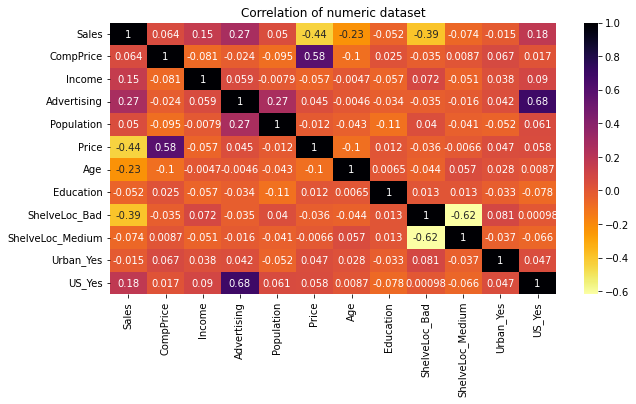

In [19]:
a = df2.corr()
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True,cmap="inferno_r")
plt.title("Correlation of numeric dataset")
plt.show()

In [20]:
# advertisement and US_yes column and compprice and price has high collinearity 
# we remove US_yes column to reduce collinarity

In [21]:
df2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,1,1
1,11.22,111,48,16,260,83,65,10,0,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,1
4,4.15,141,64,3,340,128,38,13,1,0,1,0


In [22]:
df3=df2.iloc[:,0:11]
df3

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Medium,Urban_Yes
0,9.50,138,73,11,276,120,42,17,1,0,1
1,11.22,111,48,16,260,83,65,10,0,0,1
2,10.06,113,35,10,269,80,59,12,0,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1
4,4.15,141,64,3,340,128,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,0,1
396,6.14,139,23,3,37,120,55,11,0,1,0
397,7.41,162,26,12,368,159,40,18,0,1,1
398,5.94,100,79,7,284,95,50,12,1,0,1


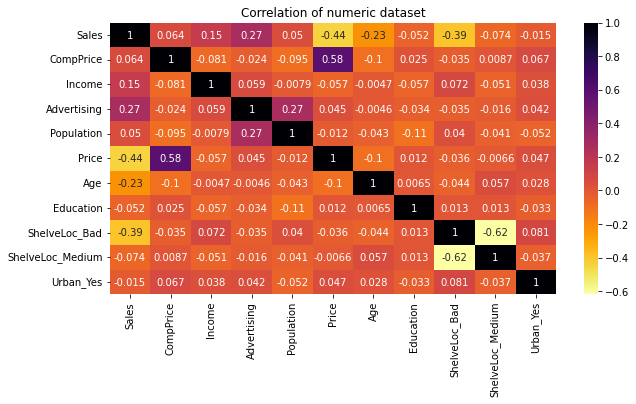

In [23]:
a = df3.corr()
plt.figure(figsize=(10,5))
sns.heatmap(a,annot=True,cmap="inferno_r")
plt.title("Correlation of numeric dataset")
plt.show()

# converting sales(float) into categorical column

In [24]:
df3["Sales"].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [25]:
df3["sales"] = pd.cut(df3["Sales"], bins = [0,9,99620], labels = ["low_sale", "high_sale"])

In [26]:
df3

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Medium,Urban_Yes,sales
0,9.50,138,73,11,276,120,42,17,1,0,1,high_sale
1,11.22,111,48,16,260,83,65,10,0,0,1,high_sale
2,10.06,113,35,10,269,80,59,12,0,1,1,high_sale
3,7.40,117,100,4,466,97,55,14,0,1,1,low_sale
4,4.15,141,64,3,340,128,38,13,1,0,1,low_sale
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,0,1,high_sale
396,6.14,139,23,3,37,120,55,11,0,1,0,low_sale
397,7.41,162,26,12,368,159,40,18,0,1,1,low_sale
398,5.94,100,79,7,284,95,50,12,1,0,1,low_sale


In [27]:
df3["sales"] = df3["sales"].replace({"high_sale":1,"low_sale":0}) #labeling: LabelEncoder

In [28]:
df3

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Medium,Urban_Yes,sales
0,9.50,138,73,11,276,120,42,17,1,0,1,1
1,11.22,111,48,16,260,83,65,10,0,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,0
4,4.15,141,64,3,340,128,38,13,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,0,1,1
396,6.14,139,23,3,37,120,55,11,0,1,0,0
397,7.41,162,26,12,368,159,40,18,0,1,1,0
398,5.94,100,79,7,284,95,50,12,1,0,1,0


In [29]:
df3.isnull().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Medium    0
Urban_Yes           0
sales               1
dtype: int64

In [30]:
d = df3[df3["sales"].isnull()].index
d

Int64Index([174], dtype='int64')

In [31]:
df4 = df3.drop(d,axis=0)

In [32]:
df4.isnull().sum()

Sales               0
CompPrice           0
Income              0
Advertising         0
Population          0
Price               0
Age                 0
Education           0
ShelveLoc_Bad       0
ShelveLoc_Medium    0
Urban_Yes           0
sales               0
dtype: int64

# split target ans features

In [33]:
df4.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Medium,Urban_Yes,sales
0,9.50,138,73,11,276,120,42,17,1,0,1,1
1,11.22,111,48,16,260,83,65,10,0,0,1,1
2,10.06,113,35,10,269,80,59,12,0,1,1,1
3,7.40,117,100,4,466,97,55,14,0,1,1,0
4,4.15,141,64,3,340,128,38,13,1,0,1,0


In [34]:
X=df4.iloc[:,1:11].values # converting into array by using .values
X

array([[138,  73,  11, ...,   1,   0,   1],
       [111,  48,  16, ...,   0,   0,   1],
       [113,  35,  10, ...,   0,   1,   1],
       ...,
       [162,  26,  12, ...,   0,   1,   1],
       [100,  79,   7, ...,   1,   0,   1],
       [134,  37,   0, ...,   0,   0,   1]], dtype=int64)

In [35]:
y=df4.iloc[:,11]

In [36]:
#standarization not required

# Train test split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.75,random_state=0)

# Base model creation

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

# Model Validation: Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [17, 15]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        68
           1       0.79      0.47      0.59        32

    accuracy                           0.79       100
   macro avg       0.79      0.70      0.72       100
weighted avg       0.79      0.79      0.77       100



In [43]:
accuracy_score(y_test,y_pred)

0.79

In [44]:
y_pred1 = model.predict(X_train)
accuracy_score(y_train,y_pred1)

1.0

# K fold testing

In [45]:
from sklearn.model_selection import KFold,cross_val_score

In [46]:
fold = KFold(n_splits=11,shuffle=False)

In [47]:
model1 = RandomForestClassifier()

results = cross_val_score(model,X,y,cv = fold)

In [48]:
results

array([0.78378378, 0.89189189, 0.89189189, 0.80555556, 0.83333333,
       0.88888889, 0.80555556, 0.97222222, 0.80555556, 0.86111111,
       0.77777778])

In [49]:
results.mean(), results.max() ,results.min()

(0.8470515970515972, 0.9722222222222222, 0.7777777777777778)

In [50]:
results.std()

0.057042768471355025

# Grid search Hyperparameter tuning ]

In [51]:
model2 = RandomForestClassifier()
param={"n_estimators":[75,150,100,180],"criterion":['gini','entropy'],"max_depth":[4,5,6,8,9,7,10]}

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid=GridSearchCV(model2,param_grid=param,cv=KFold(n_splits=10))

In [54]:
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 8, 9, 7, 10],
                         'n_estimators': [75, 150, 100, 180]})

In [55]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 100}

In [56]:
grid.best_score_

0.859423076923077

In [57]:
means=grid.cv_results_['mean_test_score']
stds=grid.cv_results_['std_test_score']
params=grid.cv_results_['params']

In [58]:
for mean,stds,params in zip(means,stds,params):
    print('{},{} with: {}'.format(means,stds,params))

[0.80198718 0.80192308 0.80948718 0.80442308 0.82442308 0.81942308
 0.81692308 0.81685897 0.81685897 0.83185897 0.83442308 0.83448718
 0.84935897 0.83685897 0.83442308 0.83692308 0.84692308 0.85192308
 0.84442308 0.83192308 0.83692308 0.84698718 0.81935897 0.83692308
 0.84205128 0.83198718 0.82685897 0.82442308 0.79935897 0.79942308
 0.80442308 0.80185897 0.82442308 0.81948718 0.82442308 0.82192308
 0.82455128 0.82692308 0.82685897 0.82942308 0.85455128 0.84455128
 0.83948718 0.84192308 0.84192308 0.84942308 0.85942308 0.83948718
 0.84442308 0.83698718 0.83435897 0.84448718 0.84461538 0.83935897
 0.83942308 0.84948718],0.07114197752712127 with: {'criterion': 'gini', 'max_depth': 4, 'n_estimators': 75}
[0.80198718 0.80192308 0.80948718 0.80442308 0.82442308 0.81942308
 0.81692308 0.81685897 0.81685897 0.83185897 0.83442308 0.83448718
 0.84935897 0.83685897 0.83442308 0.83692308 0.84692308 0.85192308
 0.84442308 0.83192308 0.83692308 0.84698718 0.81935897 0.83692308
 0.84205128 0.8319871

In [59]:
means

array([0.80198718, 0.80192308, 0.80948718, 0.80442308, 0.82442308,
       0.81942308, 0.81692308, 0.81685897, 0.81685897, 0.83185897,
       0.83442308, 0.83448718, 0.84935897, 0.83685897, 0.83442308,
       0.83692308, 0.84692308, 0.85192308, 0.84442308, 0.83192308,
       0.83692308, 0.84698718, 0.81935897, 0.83692308, 0.84205128,
       0.83198718, 0.82685897, 0.82442308, 0.79935897, 0.79942308,
       0.80442308, 0.80185897, 0.82442308, 0.81948718, 0.82442308,
       0.82192308, 0.82455128, 0.82692308, 0.82685897, 0.82942308,
       0.85455128, 0.84455128, 0.83948718, 0.84192308, 0.84192308,
       0.84942308, 0.85942308, 0.83948718, 0.84442308, 0.83698718,
       0.83435897, 0.84448718, 0.84461538, 0.83935897, 0.83942308,
       0.84948718])

# Final model

In [62]:
from sklearn.model_selection import KFold,cross_val_score
fold=KFold(n_splits=10)

In [72]:
final_model=RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=7)
final_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=7)

In [73]:
final_result=cross_val_score(final_model,X,y,cv=fold)

In [74]:
final_result

array([0.825     , 0.85      , 0.875     , 0.725     , 0.875     ,
       0.825     , 0.925     , 0.825     , 0.825     , 0.79487179])

In [75]:
final_result.mean()

0.8344871794871794

In [76]:
final_result.std()

0.05062869048082089

In [77]:
y_pred=final_model.predict(X_test)

In [79]:
accuracy_score(y_test,y_pred)

0.8